In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
data1 = pd.read_csv("House_Price_india.csv")
data1

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [9]:
data1.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv('House_Price_india.csv')

# Handle missing values (if any)
data.fillna(0, inplace=True)

# Encode categorical variables (if needed)
# Not required here since all data is numeric

# Select relevant features
features = [
    'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 
    'number of floors', 'waterfront present', 'number of views', 
    'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 
    'Area of the basement', 'Built Year', 'Renovation Year', 
    'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 
    'lot_area_renov', 'Number of schools nearby', 'Distance from the airport'
]

# Bin the target into price ranges (classification problem)
data['Price_Category'] = pd.qcut(data['Price'], q=4, labels=[0, 1, 2, 3])  

# Features and target
X = data[features]
y = data['Price_Category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Results
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Accuracy: 0.78
Confusion Matrix:
[[632 110   6   0]
 [ 96 500 120   2]
 [  7 110 516  85]
 [  1   5 107 627]]
Precision: 0.78
Recall: 0.78
F1-Score: 0.78


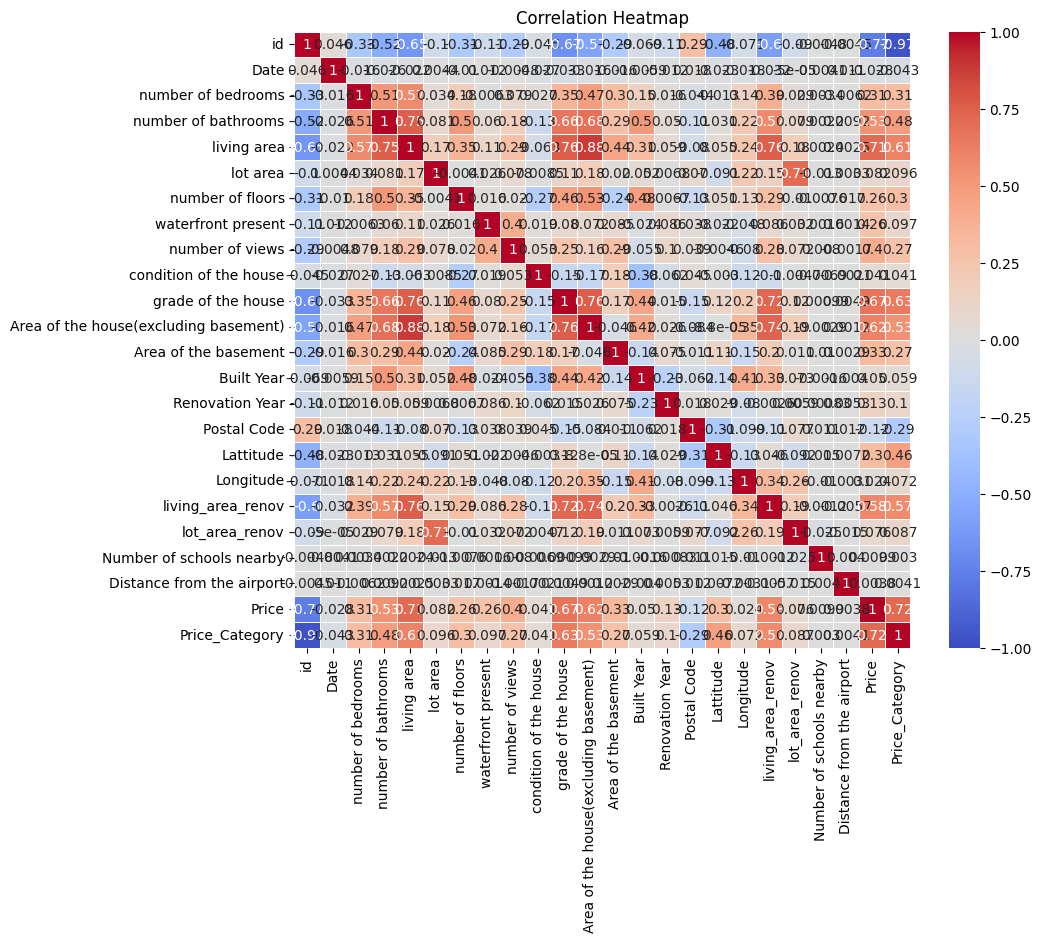

In [16]:
corr_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot = True,cmap = 'coolwarm',vmin = -1,vmax=1,center =0,square = True,linewidth = 0.5)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
mae = mean_absolute_error(y_test,y_pred)
rmse =np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
print("Mean absolute Error:", mae)
print("RMSE",rmse)
print("R-squared:", r2)

Mean absolute Error: 0.22948016415868672
RMSE 0.49518889153907075
R-squared: 0.80657957229754


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted Price Categories')
plt.xlabel('Sample Index')
plt.ylabel('Price Category')
plt.legend()
plt.show()